In [1]:
import sys
import tensorflow as tf
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm
from keras.utils import to_categorical

Using TensorFlow backend.


In [19]:
sys.path.append('../odcd/cd/')

In [20]:
from importlib import reload

In [22]:
import model_symmetries as vsf

# data prep

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

# define train and test set
np.random.seed(0)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, x_train.shape + (1,))
x_test = np.reshape(x_test, x_test.shape + (1,))
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)

idxs_train_0_5 = np.where((y_train == 5) | (y_train == 4) | (y_train == 3) | 
                    (y_train == 2) | (y_train == 1) | (y_train == 0))
idxs_test_0_5 = np.where((y_test == 5) | (y_test == 4) | (y_test == 3) | 
                    (y_test == 2) | (y_test == 1) | (y_test == 0))

idxs_train_6_9 = np.where((y_train == 6) | (y_train == 7) | (y_train == 8) | 
                    (y_train == 9))
idxs_test_6_9 = np.where((y_test == 6) | (y_test == 7) | (y_test == 8) | 
                    (y_test == 9))

print(idxs_train_0_5[0].shape)
print(idxs_test_0_5[0].shape)

x_train_0_5 = x_train[idxs_train_0_5[0]]
y_train_0_5 = y_train[idxs_train_0_5[0]]

x_train_6_9 = x_train[idxs_train_6_9[0]]
y_train_6_9 = y_train[idxs_train_6_9[0]]

print(x_train_0_5.shape, x_train_6_9.shape)
print(y_train_0_5.shape, y_train_6_9.shape)
idxs_test_0_5 = np.where((y_test == 5) | (y_test == 4) | (y_test == 3) | 
                    (y_test == 2) | (y_test == 1) | (y_test == 0))
x_test_0_5 = x_test[idxs_test_0_5[0]]

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
(36017,)
(6031,)
(36017, 28, 28, 1) (23983, 28, 28, 1)
(36017,) (23983,)


In [6]:
x_train = x_train_0_5
y_train = y_train_0_5
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)
y_train = to_categorical(y_train)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

y_train shape: (36017,) y_test shape: (10000,)
y_train shape: (36017, 6) y_test shape: (10000,)


# Model

In [7]:
import numpy as np
import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input
from keras.models import Model
from keras.utils import to_categorical

In [9]:
def superpixel(image, size=(4, 7)):
    import numpy as np
    segments = np.zeros([image.shape[0], image.shape[1]])
    row_idx, col_idx = np.where(segments == 0)
    for i, j in zip(row_idx, col_idx):
        segments[i, j] = int((image.shape[1]/size[1]) * (i//size[0]) + j//size[1])
    return segments


# define and  train an cnn model
def model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(6, activation='softmax')(x)

    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn


cnn = model()
cnn.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [10]:
print('Training cnn ...')
cnn.fit(x_train, y_train, batch_size=64, epochs=10)
print('Training done!')

Training cnn ...
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
36017/36017 [==============================] - 20s 568us/step - loss: 0.1952 - acc: 0.9358
Epoch 2/10
36017/36017 [==============================] - 20s 554us/step - loss: 0.0599 - acc: 0.9806
Epoch 3/10
36017/36017 [==============================] - 20s 556us/step - loss: 0.0452 - acc: 0.9852
Epoch 4/10
36017/36017 [==============================] - 20s 556us/step - loss: 0.0370 - acc: 0.9881
Epoch 5/10
36017/36017 [==============================] - 22s 601us/step - loss: 0.0300 - acc: 0.9905
Epoch 6/10
36017/36017 [==============================] - 21s 595us/step - loss: 0.0281 - acc: 0.9903
Epoch 7/10
36017/36017 [==============================] - 22s 615us/step - loss: 0.0248 - acc: 0.9918
Epoch 8/10
36017/36017 [==============================] - 24s 665us/step - loss: 0.0241 - acc: 0.9920
Epoch 9/10
36017/36017 [==============================] - 22s 619us/step - loss: 0.0207 - acc: 0.9933
Epoch 10/10
36017

In [11]:
cnn.save("cnn.h5")

# Vae

In [15]:
isinstance(cnn, keras.models.Model)

True

In [16]:
clf = tf.keras.models.load_model('cnn.h5')

In [50]:
reload(vsf)

<module 'model_symmetries' from '../odcd/cd/model_symmetries.py'>

In [56]:
vae = vsf.VaeSymmetryFinderConv(clf, input_shape=(28, 28, 1), rgb_filters=1, intermediate_dim=128)

32
Vae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 6272)         0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 128)          802944      flatten_1[0][0]                  
__________________________________________________________________________________________________
z_m

In [57]:
x = x_train[:1]

In [58]:
clf.predict(x)

array([[1.0233049e-09, 3.4096797e-07, 5.1316857e-08, 2.9632973e-02,
        5.8143520e-08, 9.7036654e-01]], dtype=float32)

In [59]:
vae.predict_original(x)

array([[1.0233049e-09, 3.4096797e-07, 5.1316857e-08, 2.9632973e-02,
        5.8143520e-08, 9.7036654e-01]], dtype=float32)

In [60]:
vae.fit(x_train, x_test=x_test_0_5, epochs=10)

Train on 36017 samples, validate on 6031 samples
Epoch 1/10
36017/36017 [==============================] - 37s 1ms/sample - loss: 0.7557 - val_loss: 0.2091
Epoch 2/10
36017/36017 [==============================] - 37s 1ms/sample - loss: 0.2165 - val_loss: 0.1118
Epoch 3/10
36017/36017 [==============================] - 41s 1ms/sample - loss: 0.1382 - val_loss: 0.0911
Epoch 4/10
36017/36017 [==============================] - 39s 1ms/sample - loss: 0.1021 - val_loss: 0.0694
Epoch 5/10
36017/36017 [==============================] - 38s 1ms/sample - loss: 0.0837 - val_loss: 0.0628
Epoch 6/10
36017/36017 [==============================] - 38s 1ms/sample - loss: 0.0687 - val_loss: 0.0541
Epoch 7/10
36017/36017 [==============================] - 37s 1ms/sample - loss: 0.0576 - val_loss: 0.0516
Epoch 8/10
36017/36017 [==============================] - 38s 1ms/sample - loss: 0.0530 - val_loss: 0.0510
Epoch 9/10
36017/36017 [==============================] - 40s 1ms/sample - loss: 0.0485 - val_l

Sample instance from the MNIST data set.


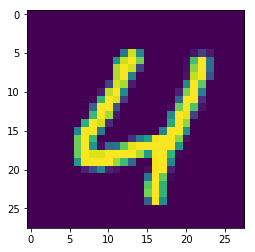

In [61]:
idx = 39
x = x_train[idx: idx + 1]
plt.imshow(np.squeeze(x))
print('Sample instance from the MNIST data set.')

In [62]:
outs_1 = vae.vae.predict(x)
outs_2 = vae.vae.predict(x)

In [63]:
symmetric_sample_1 = outs_1[0]
symmetric_sample_2 = outs_2[0]

orig_pred_1 = outs_1[1]
orig_pred_2 = outs_2[1]

trans_pred_1 = outs_1[2]
trans_pred_2 = outs_2[2]

In [64]:
orig_pred_1

array([[8.2327875e-07, 1.5958426e-08, 4.4035596e-07, 2.6171629e-10,
        9.9999869e-01, 1.8416146e-10]], dtype=float32)

In [65]:
trans_pred_1

array([[5.7590867e-05, 3.8177197e-04, 3.7516536e-05, 6.4176375e-06,
        9.9922156e-01, 2.9511211e-04]], dtype=float32)

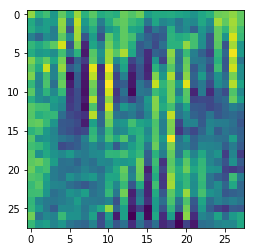

In [66]:
plt.imshow(np.squeeze(symmetric_sample_1))

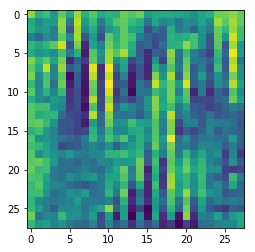

In [67]:
plt.imshow(np.squeeze(symmetric_sample_2))

# Test as concept drift detector

In [68]:
from scipy.ndimage import rotate
import pandas as pd
from scipy.stats import entropy

In [69]:
y_test.shape

(10000,)

In [70]:
x_test_0_5.shape

(6031, 28, 28, 1)

In [71]:
x_test_0_5 = x_test[idxs_test_0_5[0]]
y_test_0_5 = y_test[idxs_test_0_5[0]]

In [72]:
vae_outs_train = vae.vae.predict(x_train.reshape(x_train.shape[0], 28, 28, 1))
vae_outs_bl = vae.vae.predict(x_test_0_5.reshape(x_test_0_5.shape[0], 28, 28, 1))

In [73]:
symm_samples_train = vae_outs_train[0]
orig_preds_train = vae_outs_train[1]
trans_preds_train = vae_outs_train[2]

symm_samples_bl = vae_outs_bl[0]
orig_preds_bl = vae_outs_bl[1]
trans_preds_bl = vae_outs_bl[2]

In [74]:
kl_train = entropy(orig_preds_train.T, trans_preds_train.T)
kl_bl = entropy(orig_preds_bl.T, trans_preds_bl.T)

In [75]:
preds_train = np.argmax(orig_preds_train, axis=1)
labels_train = np.argmax(y_train, axis=1)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(preds_train, labels_train)
print(acc_train)

preds_bl = np.argmax(orig_preds_bl, axis=1)
from sklearn.metrics import accuracy_score
acc_bl = accuracy_score(preds_bl, y_test_0_5)
print(acc_bl)

0.9991115306660744
0.9976786602553473


### Rotations

In [77]:
vae_outs_test = vae.vae.predict(x_test_0_5)
symm_samples_test = vae_outs_test[0]
orig_preds_test = vae_outs_test[1]
trans_preds_test = vae_outs_test[2]
    
kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
baseline_std_plus = kl_test.mean() + kl_test.std()
baseline_std_minus = kl_test.mean() - kl_test.std()

In [99]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
for i in range(45):
    
    print('Rotating images by {} degree'.format(i))
    x_test_0_5_rot = rotate(x_test_0_5, i, axes=(1, 2), reshape=False)
    
    vae_outs_test = vae.vae.predict(x_test_0_5_rot.reshape(x_test_0_5_rot.shape[0], 28, 28, 1))
    symm_samples_test = vae_outs_test[0]
    orig_preds_test = vae_outs_test[1]
    trans_preds_test = vae_outs_test[2]
    
    kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
    mean_test.append(kl_test.mean())
    std_test.append(kl_test.std())
    preds_test = np.argmax(orig_preds_test, axis=1)
    accs_test.append(accuracy_score(preds_test, y_test_0_5))
    baseline_stds_plus.append(baseline_std_plus)
    baseline_stds_minus.append(baseline_std_minus)

Rotating images by 0 degree
Rotating images by 1 degree
Rotating images by 2 degree
Rotating images by 3 degree
Rotating images by 4 degree
Rotating images by 5 degree
Rotating images by 6 degree
Rotating images by 7 degree
Rotating images by 8 degree
Rotating images by 9 degree
Rotating images by 10 degree
Rotating images by 11 degree
Rotating images by 12 degree
Rotating images by 13 degree
Rotating images by 14 degree
Rotating images by 15 degree
Rotating images by 16 degree
Rotating images by 17 degree
Rotating images by 18 degree
Rotating images by 19 degree
Rotating images by 20 degree
Rotating images by 21 degree
Rotating images by 22 degree
Rotating images by 23 degree
Rotating images by 24 degree
Rotating images by 25 degree
Rotating images by 26 degree
Rotating images by 27 degree
Rotating images by 28 degree
Rotating images by 29 degree
Rotating images by 30 degree
Rotating images by 31 degree
Rotating images by 32 degree
Rotating images by 33 degree
Rotating images by 34 de

In [100]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95051da210>,
      dtype=object)

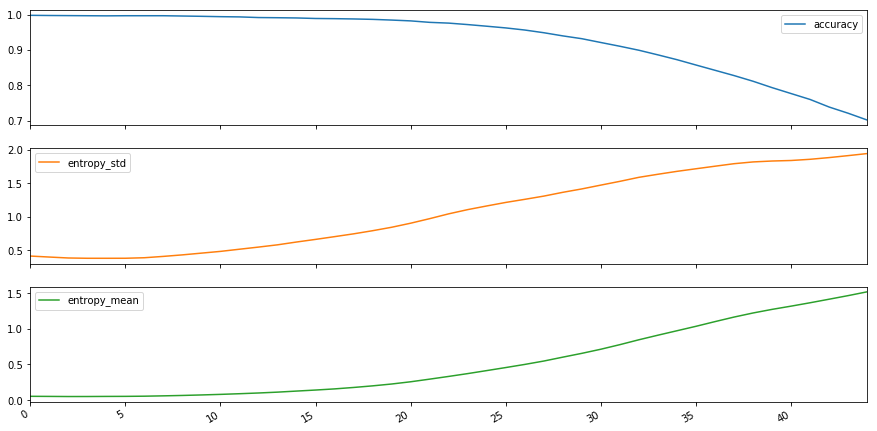

In [101]:
df[['accuracy','entropy_std','entropy_mean']].plot(logy = False, subplots=True, figsize = (15, 8))

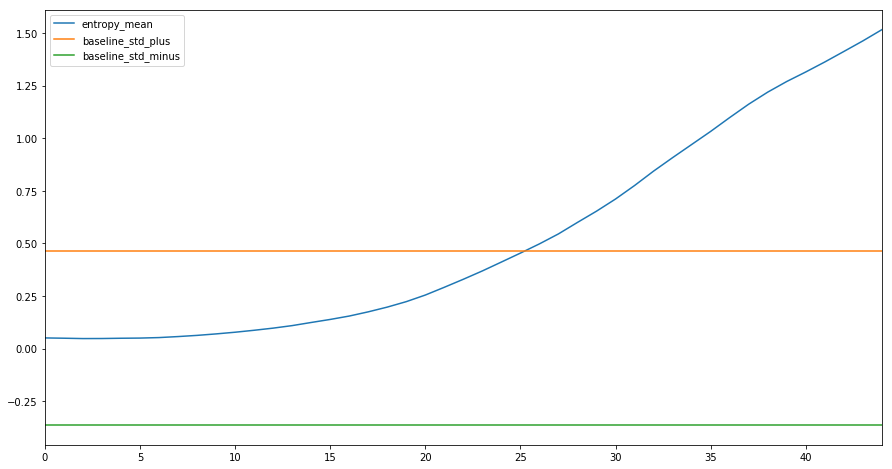

In [102]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

In [45]:
#df.plot(logy = False, subplots=True, figsize = (15, 8))

### Contamination

In [82]:
idx_test_6 = np.where(y_test == 6)
x_test_6 = x_test[idx_test_6]
x_test_6.shape
y_test_6 = y_test[idx_test_6]

In [84]:
rnd_idxs_6  = np.random.choice(range(len(x_test_6)), 10)
x_cont_6  = x_test_6[rnd_idxs_6]

In [86]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []

for i in range(0, len(x_test_6), 15):
    rnd_idxs_6  = np.random.choice(range(len(x_test_6)), i)
    x_cont_6 = x_test_6[rnd_idxs_6]
    y_cont_6 = y_test_6[rnd_idxs_6]
    print('Number of contaminations: {} '.format(i))
    x_test_0_5_cont = np.concatenate((x_test_0_5, x_cont_6), axis=0)
    y_test_0_5_cont = np.concatenate((y_test_0_5, y_cont_6), axis=0)
    vae_outs_test = vae.vae.predict(x_test_0_5_cont.reshape(x_test_0_5_cont.shape[0], 28, 28, 1))
    symm_samples_test = vae_outs_test[0]
    orig_preds_test = vae_outs_test[1]
    trans_preds_test = vae_outs_test[2]
    
    kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
    mean_test.append(kl_test.mean())
    std_test.append(kl_test.std())
    preds_test = np.argmax(orig_preds_test, axis=1)
    accs_test.append(accuracy_score(preds_test, y_test_0_5_cont))
    baseline_stds_plus.append(baseline_std_plus)
    baseline_stds_minus.append(baseline_std_minus)

Number of contaminations: 0 
Number of contaminations: 15 
Number of contaminations: 30 
Number of contaminations: 45 
Number of contaminations: 60 
Number of contaminations: 75 
Number of contaminations: 90 
Number of contaminations: 105 
Number of contaminations: 120 
Number of contaminations: 135 
Number of contaminations: 150 
Number of contaminations: 165 
Number of contaminations: 180 
Number of contaminations: 195 
Number of contaminations: 210 
Number of contaminations: 225 
Number of contaminations: 240 
Number of contaminations: 255 
Number of contaminations: 270 
Number of contaminations: 285 
Number of contaminations: 300 
Number of contaminations: 315 
Number of contaminations: 330 
Number of contaminations: 345 
Number of contaminations: 360 
Number of contaminations: 375 
Number of contaminations: 390 
Number of contaminations: 405 
Number of contaminations: 420 
Number of contaminations: 435 
Number of contaminations: 450 
Number of contaminations: 465 
Number of contam

In [89]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9505356190>,
      dtype=object)

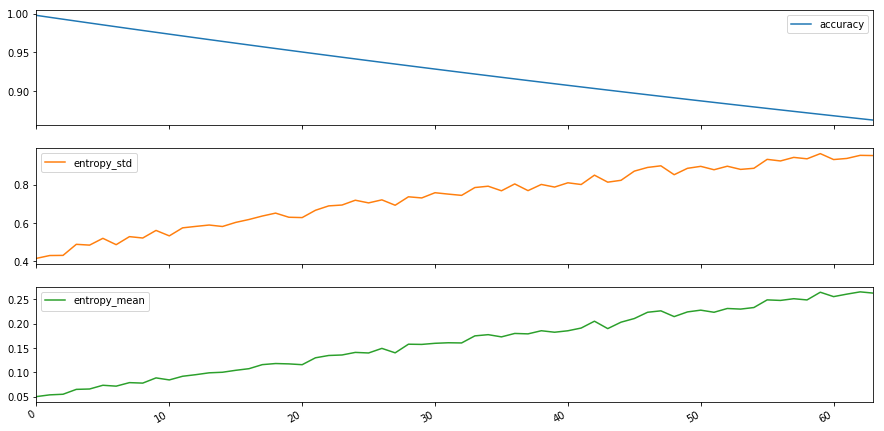

In [98]:
df[['accuracy','entropy_std','entropy_mean']].plot(logy = False, subplots=True, figsize = (15, 8))

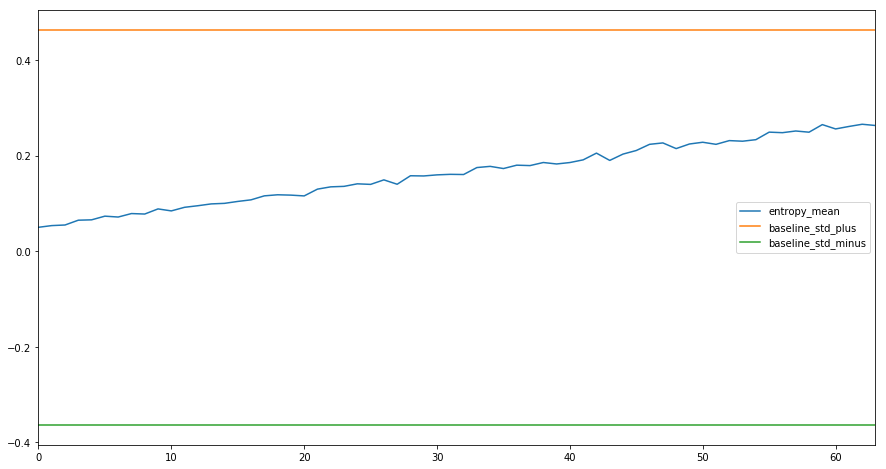

In [91]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

In [92]:
#df = pd.DataFrame()
#df['accuracy'] = accs_test
#df['entropy_mean'] = mean_test
#df['entropy_std'] = std_test

In [93]:
#df.plot(logy = False, subplots=True, figsize = (15, 8))

In [97]:
df

,accuracy,entropy_mean,entropy_std,baseline_std_plus,baseline_std_minus
0,0.997679,0.049989,0.414312,0.463379,-0.363646
1,0.995203,0.053553,0.429154,0.463379,-0.363646
2,0.992740,0.054804,0.429856,0.463379,-0.363646
3,0.990290,0.064843,0.487890,0.463379,-0.363646
4,0.987851,0.065614,0.483721,0.463379,-0.363646
...,...,...,...,...,...
59,0.870012,0.264802,0.963613,0.463379,-0.363646
60,0.868129,0.255759,0.932522,0.463379,-0.363646
61,0.866254,0.260910,0.938378,0.463379,-0.363646
62,0.864387,0.265555,0.954578,0.463379,-0.363646


In [42]:
kl_test.mean()

0.17890525

# Cherry pick

In [49]:
preds_test = np.argmax(clf.predict(x_test_0_5), axis=1)
preds_test

array([2, 1, 0, ..., 3, 4, 5])

In [55]:
idx_miss = np.where(preds_test != y_test_0_5)

In [59]:
x_miss = x_test_0_5[idx_miss]

In [60]:
vae_outs_train = vae.vae.predict(x_test_0_5.reshape(x_test_0_5.shape[0], 28, 28, 1))
vae_outs_test = vae.vae.predict(x_miss.reshape(x_miss.shape[0], 28, 28, 1))

symm_samples_train = vae_outs_train[0]
orig_preds_train = vae_outs_train[1]
trans_preds_train = vae_outs_train[2]

symm_samples_test = vae_outs_test[0]
orig_preds_test = vae_outs_test[1]
trans_preds_test = vae_outs_test[2]

In [61]:
kl_train = entropy(orig_preds_train.T, trans_preds_train.T)
kl_test = entropy(orig_preds_test.T, trans_preds_test.T)

In [62]:
S_train = pd.Series(kl_train, name='train')
S_test = pd.Series(kl_test, name='test')
df_kl = pd.merge(S_train.to_frame(), S_test.to_frame(), right_index=True, left_index=True, how='outer')

0.03827944025397301 0.30201488733291626
1.4426838159561157 1.7499723434448242


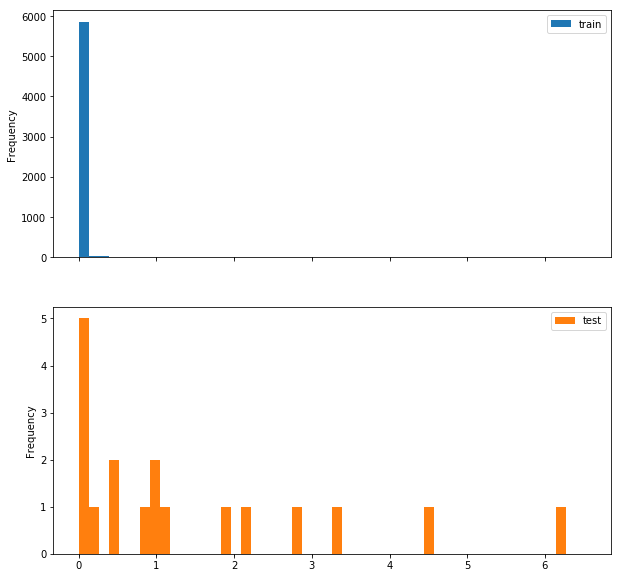

In [63]:
df_kl.plot(kind='hist', bins=50, subplots=True, figsize=(10, 10))
print(S_train.mean(), S_train.std())
print(S_test.mean(), S_test.std())

In [64]:
S_test

0     0.055232
1     0.985691
2     3.308836
3     0.799344
4     4.443614
5     2.094492
6     0.083315
7     1.148329
8     0.028951
9     0.428228
10    0.142924
11    0.033493
12    0.920331
13    1.905113
14    0.090810
15    2.762497
16    6.239838
17    0.497271
Name: test, dtype: float32

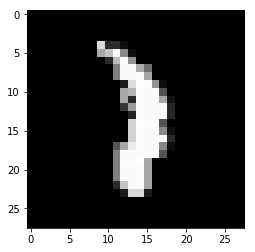

In [67]:
plt.imshow(np.squeeze(x_miss[2]), 'gray')

In [ ]:
y